# Assignment 06

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions

In [20]:
rand_state= 1000

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data preprocessing

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.nunique()

age                   47
bmi                  548
children               6
charges             1337
sex_male               2
smoker_yes             2
region_northwest       2
region_southeast       2
region_southwest       2
dtype: int64

In [7]:
df=pd.get_dummies(df,drop_first=True)

In [8]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_yes,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


# Data visualization

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


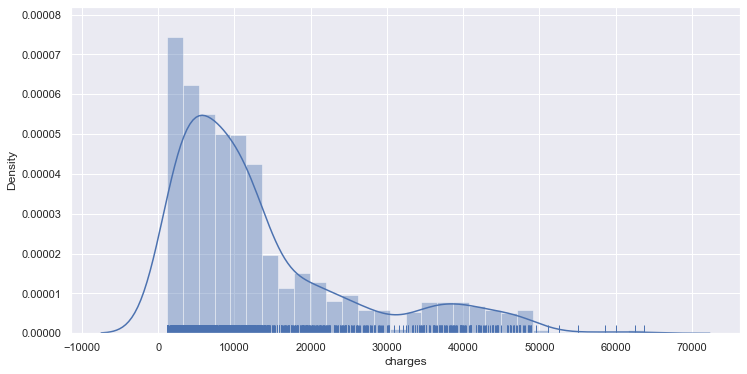

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df['charges'], rug=True)
plt.show()

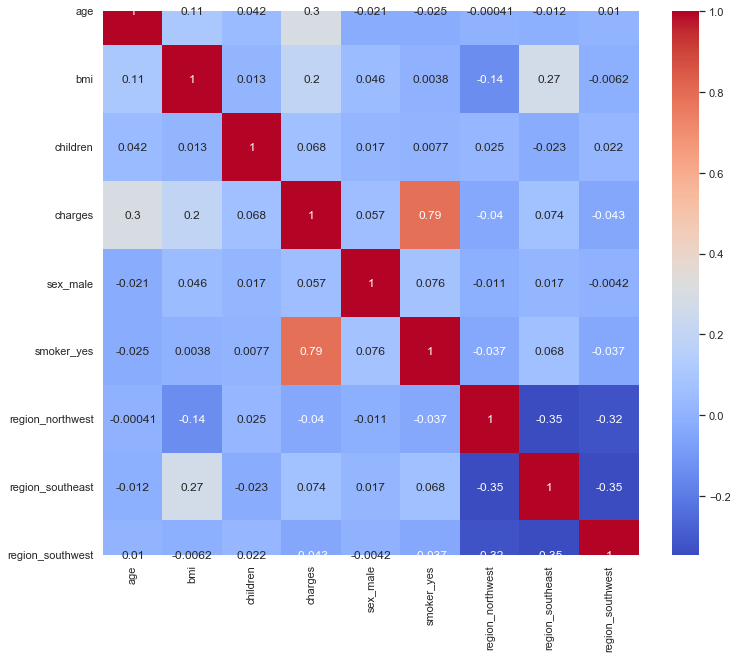

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

# Train and Test set Split

In [21]:
y = df['charges']
X = df.drop('charges', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.7

In [22]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
204,46,22.300,0,1,0,0,0,1
1264,49,33.345,2,0,0,0,0,0
313,49,35.860,0,1,0,0,1,0
1283,18,30.030,1,1,0,0,1,0
321,26,29.640,4,0,0,0,0,0


# Linear Regression with Scikit-Learn

In [23]:
reg_model = LinearRegression()

In [24]:
reg_model.fit(X_train, y_train)

LinearRegression()

# Predictions:

In [25]:
y_hat = reg_model.predict(X_test)

In [26]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
132,11163.56800,13605.292414,-2441.724414
51,3579.82870,5543.976255,-1964.147555
42,6272.47720,5490.008405,782.468795
569,45702.02235,37713.906279,7988.116071
470,2497.03830,4822.688567,-2325.650267


Coefficients:

In [27]:
# The coefficients of the regression
reg_model.coef_

array([  252.80646825,   299.71267201,   391.90028143,  -256.25306699,
       23521.90106851,  -113.686827  , -1024.03552983,  -822.52541748])

In [28]:
# The intercept of the regression
reg_model.intercept_

-10514.410473905544

In [29]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,age,252.8065
1,bmi,299.7127
2,children,391.9003
3,sex_male,-256.2531
4,smoker_yes,23521.9011
5,region_northwest,-113.6868
6,region_southeast,-1024.0355
7,region_southwest,-822.5254


# Evaluation metrics:

# R-squared

In [30]:
# The train set R-squared of the regression
reg_model.score(X_train,y_train)

0.7362514073650333

In [31]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_test, y_test),3))

Training data R-squared: 0.736
Test data R-squared: 0.778


# Adjusted R-squared

In [32]:
X_train.shape

(936, 8)

In [33]:
def adj_R2(X,y): 
    R2 = reg_model.score(X,y)
    n  = X.shape[0]
    k  = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [34]:
adj_R2(X_train,y_train)

0.734

In [35]:
adj_R2(X_test,y_test)

0.773

# MSE and RMSE

In [36]:
df_predictions.head()

,actuals,predictions,resid
132,11163.56800,13605.292414,-2441.724414
51,3579.82870,5543.976255,-1964.147555
42,6272.47720,5490.008405,782.468795
569,45702.02235,37713.906279,7988.116071
470,2497.03830,4822.688567,-2325.650267


In [37]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

35670540.658

In [38]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5972.482

# KNN Regression with Sklearn

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [42]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
132,11163.56800,21394.843524
51,3579.82870,7372.140334
42,6272.47720,16668.417360
569,45702.02235,16023.322760
470,2497.03830,9547.481108


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


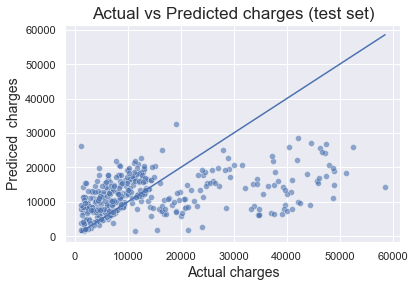

In [43]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Prediced  charges', fontsize=14)
plt.title('Actual vs Predicted charges (test set)', fontsize=17)
plt.show()

In [44]:
KNN_regression.score(X_test, y_test)

0.16183806999549333

In [45]:
KNN_regression.score(X_train, y_train)

0.4052949962321615

# Performance metrics:

In [46]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

134561442.83

In [47]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

11600.06